# Section 2.2.3: Large dimensional sample covariance matrices and deformed semi-circles

This page contains simulations in Section 2.2.3.

## Contents

    - Large dimensional sample covariance matrix (Theorem 2.5)
    - The bi-correlated model (Theorem 2.6)
    - Sample covariance of $k$-class mixture models (Theorem 2.7)
    - The deformed semi-circle law (Theorem 2.8)

## Large dimensional sample covariance matrix (Theorem 2.5)

Generate a (Gaussian i.i.d.) random matrix $Z$ of dimension $p \times n$ Generate the associated data matrix 

In [119]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
pi = np.pi

In [120]:
coeff = 3
p = 100*coeff
n = 1000*coeff
c = p/n

eigs_C = np.concatenate([np.ones(p//3),3*np.ones(p//3),7*np.ones(p//3)]) #eigs_C = [1,..,3,...,5...]
C = np.mat(np.diag(eigs_C)) # population covariance

np.random.seed(928)
Z = np.mat(np.random.randn(p,n))
X = scipy.linalg.sqrtm(C)*Z

Empirical eigenvalues of the sample covariance matrix $\frac1n X X^T = \frac1n C^{\frac12} Z Z^T C ^{\frac12}$ versus the solution of fixed-point equation in Theorem 2.5

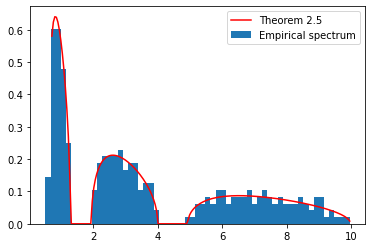

In [121]:
Tol = 1e-1
SCM = X@X.T/n
eigs_SCM = np.linalg.eig(SCM)[0]
edges    = np.linspace(np.min(eigs_SCM)-Tol,np.max(eigs_SCM)+Tol,60)
edges_mu = np.linspace(np.min(eigs_SCM)+Tol,np.max(eigs_SCM)+Tol,200)

y = 1e-5
zs = edges_mu+y*1j
mu = []

tilde_m=0
for z in zs:

    tilde_m_tmp=-1
    while abs(tilde_m-tilde_m_tmp)>1e-6:
        tilde_m_tmp=tilde_m
        tilde_m = 1/( -z + 1/n*np.sum(eigs_C/(1+tilde_m*eigs_C)) )

    m = tilde_m/c+(1-c)/(c*z)
    mu.append(np.imag(m)/pi)

plt.hist(eigs_SCM,bins=edges,weights=1/p/(edges[1]-edges[0])*np.ones(p),label='Empirical spectrum')
plt.plot(edges_mu,mu,'r',label='Theorem 2.5')
_ = plt.legend()

## The bi-correlated model (Theorem 2.6)

Generate a (Gaussian i.i.d.) random matrix $Z$ of dimension $p \times n$ Generate the associated data matrix 

In [122]:
coeff = 3
p = 200*coeff
n = 1000*coeff

eigs_C = np.concatenate([np.ones(p//3),3*np.ones(p//3),8*np.ones(p//3)])
eigs_tilde_C = np.concatenate([np.ones(n//2),3/2*np.ones(n//2)])

C = np.mat(np.diag(eigs_C))
tilde_C = np.mat(np.diag(eigs_tilde_C))

np.random.seed(928)
Z = np.mat(np.random.randn(p,n))
X = np.sqrt(C) @ Z @ np.sqrt(tilde_C)

## Empirical eigenvalues of the sample covariance matrix $\frac1n X X^T = \frac1n C^{\frac12} Z \tilde C Z^T C^{\frac12}$ versus the solution of (symmetric) fixed-point equation systems in Theorem 2.6

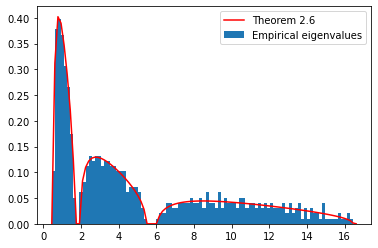

In [123]:
SCM = X@(X.T)/n
eigs_SCM = np.linalg.eig(SCM)[0]
edges_mu = np.linspace(np.min(eigs_SCM)-.1,np.max(eigs_SCM)+.2,100)

y  = 1e-5
zs = edges_mu+y*1j
mu = []

delta = np.array([0,0]) # corresponds to [delta, tilde_delta] in Theorem 2.6
for z in zs:

    delta_tmp = np.array([1,1])
    #watch_dog = 1 # to avoid possible numerical convergence issue
    while np.abs(delta[0]-delta_tmp[0])>1e-6: # and watch_dog < 50
        delta_tmp = delta
        delta = -1/n/z*np.sum(eigs_C/( 1 + delta_tmp[1]*eigs_C )),-1/n/z*np.sum(eigs_tilde_C/( 1 + delta_tmp[0]*eigs_tilde_C ))

    m = -1/p/z*np.sum(1/(1 + delta[1]*eigs_C) )
    mu.append(np.imag(m)/pi)

plt.hist(eigs_SCM,bins=edges_mu,weights=1/p/(edges_mu[1]-edges_mu[0])*np.ones(p),label='Empirical eigenvalues')
plt.plot(edges_mu,mu,'r',label='Theorem 2.6')
_ = plt.legend()

## Sample covariance of $k$-class mixture models (Theorem 2.7)

Generate a (Gaussian i.i.d.) random matrix $Z$ of dimension $p \times n$ Generate the associated data matrix $X = [C_1^{\frac12}z_1, \ldots, C_i^{\frac12}z_i,\ldots]$

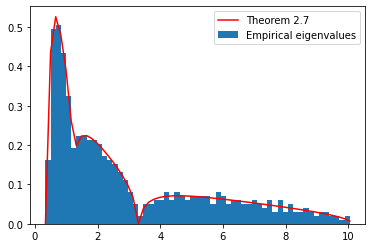

In [171]:
coeff = 3
p = 200*coeff
n = 1000*coeff
c = p/n

eigs_C = lambda a : np.concatenate([np.ones(p//3),a*np.ones(p//3),a**2*np.ones(p//3)])
C = lambda a : np.mat(np.diag(eigs_C(a)))
# fell free to vary the setting of C_a, a=1,...,k

#cs  = np.ones(k)/k  # the vector of c_a, a=1,...,k, proportion in each class
cs = [1/4,1/4,1/2]
k  = len(cs)  # k classes in total

np.random.seed(928)
X = np.mat(np.zeros( (p,n) ))
for i in range(k):
    X[:,int(np.sum(cs[:i])*n):int(np.sum(cs[:i+1])*n)] = np.mat(scipy.linalg.sqrtm(C(i+1)))@np.mat(np.random.randn(p,int(cs[i]*n)))

# Empirical eigenvalues of the mixture sample covariance matrix $\frac1n X X^T$
# versus the solution of the system of equations in Theorem 2.7
SCM = X@(X.T)/n
eigs_SCM = np.linalg.eig(SCM)[0]
edges_mu = np.linspace(np.min(eigs_SCM)-.1,np.max(eigs_SCM)+.1,60)

y = 1e-5
zs = edges_mu+y*1j
mu = []

tilde_g = np.ones(k)+1j*0 # corresponds to [tilde_g_1, ..., tilde_g_k] in Theorem 2.6
g = np.ones(k)+1j*0
for z in zs:
    tilde_g_tmp = np.zeros(k)+1j*0
    #watch_dog = 1 # to avoid possible numerical convergence issue
    while np.sum(np.abs(tilde_g-tilde_g_tmp))>1e-6: #and watch_dog<50:
        tilde_g_tmp[:] = tilde_g[:]
        
        eigs_C_sum = np.zeros(p)+1j*0
        for b in range(k):
            eigs_C_sum += cs[b]*tilde_g[b]*eigs_C(b+1)

        for a in range(k):
            g[a] = -1/n/z*np.sum( eigs_C(a+1)/(1 + eigs_C_sum) )
            tilde_g[a] = -1/z/(1+g[a])

    m = -1/p/z*np.sum(1/(1 + eigs_C_sum))
    mu.append(np.imag(m)/pi)    
    
plt.hist(eigs_SCM,bins=edges_mu,weights=1/p/(edges_mu[1]-edges_mu[0])*np.ones(p),label='Empirical eigenvalues')
plt.plot(edges_mu,mu,'r',label='Theorem 2.7')
_ = plt.legend()

## The deformed semi-circle law (Theorem 2.8)

Generate a (Gaussian) symmetric random matrix $Z$ of size $n \times n$.

In [125]:
coeff = 2
n=500*coeff

np.random.seed(928)
Z=np.mat(np.random.randn(n,n))
Z_U = np.triu(Z)
X = np.triu(Z) + np.triu(Z,1).T

bern_mask_p = .1

bern_mask = (np.random.rand(n,n)<bern_mask_p)
bern_mask_U = np.triu(bern_mask)
bern_mask = np.triu(bern_mask_U) + np.triu(bern_mask_U,1).T

Empirical eigenvalues of $\frac1{\sqrt n} X\odot {\rm Mask}$ versus the deformed semi-circle law.

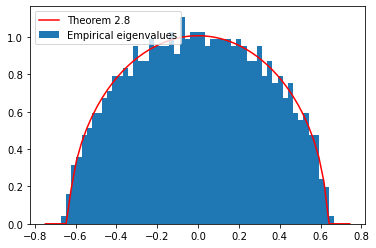

In [126]:
DSC = (X * bern_mask)/np.sqrt(n)
eigs_DSC = np.linalg.eig(DSC)[0]
edges_mu=np.linspace(np.min(eigs_DSC)-.1,np.max(eigs_DSC)+.1,60)

y = 1e-5
zs = edges_mu+y*1j
mu = []

g = 0
for z in zs:
    g_tmp = 1
    while abs(g - g_tmp)>1e-6:
        g_tmp=g
        g = -bern_mask_p/(1+g)/z**2

    m = -1/(1+g)/z
    mu.append(np.imag(m)/pi)

plt.hist(eigs_DSC,edges_mu,weights=1/n/(edges_mu[1]-edges_mu[0])*np.ones(n),label='Empirical eigenvalues')
plt.plot(edges_mu,mu,'r',label='Theorem 2.8')
_ = plt.legend()